# Example code to create a count table 

In [1]:
import numpy as np
import pandas as pd
from kipoiseq.extractors import MultiSampleVCF
from splicemap.dataclasses import Junction
from splicemap import SpliceCountTable as CountTable
import matplotlib.pyplot as plt

In [2]:
fasta_file = '/s/genomes/human/hg19/fasta/Homo_sapiens.GRCh37.75.dna_sm.primary_assembly.fa'
gtf_file = '/s/genomes/human/hg19/gencode34/gencode.v34lift37.annotation.gtf'
gtf_junction_file = '/s/project/gtex-processed/mmsplice-scripts/data/processed/junction-annotation/gtf_junctions.csv'

## 1) Read in example file

In [ ]:
path = '/s/project/gtex-processed/mmsplice-scripts/data/processed/junction-annotation/Brain_Cortex_raw_count_table.csv'
ct = CountTable.read_csv(path)

### 1.1) Infer Strand (if no strand)
If strand information does not contained in count_table it can be infered by reference genome.

In [4]:
ct.df['Strand'] = '.' # removes strand information

In [5]:
ct.df['Strand'] = ct.df['Strand'].astype("category")

In [6]:
ct.infer_strand(fasta_file, progress=True)

100%|██████████| 1065286/1065286 [01:15<00:00, 14138.13it/s]


In [7]:
ct.df

,Chromosome,Start,End,Strand,GTEX-111FC,GTEX-1128S,GTEX-117XS,GTEX-1192X,GTEX-11DXW,GTEX-11DXY,...,GTEX-X585,GTEX-XLM4,GTEX-XOTO,GTEX-YFC4,GTEX-Z93S,GTEX-ZAK1,GTEX-ZUA1,GTEX-ZVT3,GTEX-ZYFD,GTEX-ZZPT
junctions,,,,,,,,,,,,,,,,,,,,,
1:10895-10969:+,1,10895,10969,+,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1:11211-12009:+,1,11211,12009,+,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1:11671-12009:+,1,11671,12009,+,1,0,1,0,0,1,...,2,0,3,0,0,0,1,1,0,1
1:11844-12009:+,1,11844,12009,+,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
1:12227-12594:+,1,12227,12594,+,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y:58888289-58902586:+,Y,58888289,58902586,+,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Y:58888289-58909682:-,Y,58888289,58909682,-,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Y:58895447-58909682:-,Y,58895447,58909682,-,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2) Use quality filters to generate a reference table

Notes for provided quality filters in the count_table package:

### 2.1) Median filter
We use 'event5_median_filter' and 'event3_median_filter', which filters for events/splice-sites that have a median count over a certain cutoff value. Note that results depend a lot on the choice of this cutoff value

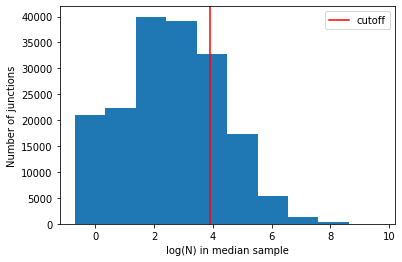

In [9]:
cutoff = 50

ct.plot_median_read_hist_event5()
plt.axvline(np.log(cutoff), 0, 1, label='cutoff', c='red')
plt.legend()

In [10]:
ct_psi5 = ct.event5_median_filter(cutoff=cutoff)
ct_psi3 = ct.event3_median_filter(cutoff=cutoff)

`event5_count_filter` and `event3_count_filter` uses GaussianMixture model (no hard cutoff). This underestimates. Reports lots of regions to be expressed, although they are not expressed
Therefore currently '_median_filter' is used, which uses a hard cutoff. As a cutoff for the GTEx data 50 was chosen|

### 2.2) Quantile filter
We first use 'quantile_filter', which filters for junctions that are observed in at least 5% of the samples

In [11]:
ct_psi5 = ct_psi5.quantile_filter()
ct_psi3 = ct_psi3.quantile_filter()

### 2.3) Infer annotation of junctions from standart annotation

In [12]:
ct_psi5.infer_annotation(gtf_file, gtf_junction_file)

/opt/modules/i12g/anaconda/envs/celikm-count-table/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,gene_id,gene_name,gene_type,weak,transcript_id
junctions,,,,,
10:100177479-100177931:-,ENSG00000107521.19_7,HPS1,protein_coding,True,NaN
10:100177483-100177931:-,ENSG00000107521.19_5,HPS1,protein_coding,False,ENST00000325103.10_2;ENST00000361490.9_3;ENST0...
10:100178014-100179801:-,ENSG00000107521.19_5,HPS1,protein_coding,False,ENST00000613394.4_2;ENST00000462743.1_1;ENST00...
10:100179915-100182125:-,ENSG00000107521.19_5,HPS1,protein_coding,False,ENST00000325103.10_2;ENST00000361490.9_3;ENST0...
10:100182266-100183359:-,ENSG00000107521.19_7,HPS1,protein_coding,True,NaN
...,...,...,...,...,...
Y:2713784-2722640:+,ENSG00000129824.16_4,RPS4Y1,protein_coding,False,ENST00000250784.13_2;ENST00000430575.1_2
Y:2722812-2733128:+,ENSG00000129824.16_4,RPS4Y1,protein_coding,False,ENST00000250784.13_2;ENST00000477725.1_1;ENST0...
Y:2722812-2734833:+,ENSG00000129824.16_5,RPS4Y1,protein_coding,True,NaN


In [13]:
ct_psi3.infer_annotation(gtf_file, gtf_junction_file)

/opt/modules/i12g/anaconda/envs/celikm-count-table/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,gene_id,gene_name,gene_type,weak,transcript_id
junctions,,,,,
10:100177483-100177642:-,ENSG00000107521.19_7,HPS1,protein_coding,True,NaN
10:100177483-100177931:-,ENSG00000107521.19_5,HPS1,protein_coding,False,ENST00000325103.10_2;ENST00000361490.9_3;ENST0...
10:100178014-100179797:-,ENSG00000107521.19_7,HPS1,protein_coding,True,NaN
10:100178014-100179801:-,ENSG00000107521.19_5,HPS1,protein_coding,False,ENST00000613394.4_2;ENST00000462743.1_1;ENST00...
10:100179915-100182125:-,ENSG00000107521.19_5,HPS1,protein_coding,False,ENST00000325103.10_2;ENST00000361490.9_3;ENST0...
...,...,...,...,...,...
Y:2721732-2722640:+,ENSG00000129824.16_5,RPS4Y1,protein_coding,True,NaN
Y:2722745-2734833:+,ENSG00000129824.16_5,RPS4Y1,protein_coding,True,NaN
Y:2722812-2733128:+,ENSG00000129824.16_4,RPS4Y1,protein_coding,False,ENST00000250784.13_2;ENST00000477725.1_1;ENST0...


### 2.4) Generate splicing reference table

In [14]:
df_psi5 = ct_psi5.ref_psi5()
df_psi3 = ct_psi3.ref_psi3()

In [15]:
df_psi5

,Chromosome,Start,End,Strand,splice_site,events,ref_psi,k,n,gene_id,gene_name,gene_type,weak,transcript_id
junctions,,,,,,,,,,,,,,
1:948956-949363:+,1,948956,949363,+,1:948956:+,1:948956-949363:+,1.000000,19049,19049,ENSG00000187608.9_6,ISG15,protein_coding,False,ENST00000649529.1_2;ENST00000379389.4_3
1:977082-977335:+,1,977082,977335,+,1:977082:+,1:977082-977335:+;1:977082-977340:+,0.996254,5319,5339,ENSG00000188157.15_5,AGRN,protein_coding,False,ENST00000651234.1_1;ENST00000652369.1_1;ENST00...
1:977082-977340:+,1,977082,977340,+,1:977082:+,1:977082-977335:+;1:977082-977340:+,0.003746,20,5339,ENSG00000188157.15_6,AGRN,protein_coding,True,NaN
1:978837-978917:+,1,978837,978917,+,1:978837:+,1:978837-978917:+;1:978837-979202:+,0.998842,5176,5182,ENSG00000188157.15_5,AGRN,protein_coding,False,ENST00000651234.1_1;ENST00000652369.1_1;ENST00...
1:978837-979202:+,1,978837,979202,+,1:978837:+,1:978837-978917:+;1:978837-979202:+,0.001158,6,5182,ENSG00000188157.15_6,AGRN,protein_coding,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y:21868231-21868326:-,Y,21868231,21868326,-,Y:21868326:-,Y:21868231-21868326:-,1.000000,6502,6502,ENSG00000012817.15_5,KDM5D,protein_coding,False,ENST00000382806.6_2;ENST00000492117.1_1;ENST00...
Y:21868494-21868679:-,Y,21868494,21868679,-,Y:21868679:-,Y:21868494-21868679:-;Y:21868526-21868679:-,0.081702,455,5569,ENSG00000012817.15_9,KDM5D,protein_coding,True,NaN
Y:21868526-21868679:-,Y,21868526,21868679,-,Y:21868679:-,Y:21868494-21868679:-;Y:21868526-21868679:-,0.918298,5114,5569,ENSG00000012817.15_5,KDM5D,protein_coding,False,ENST00000541639.5_3;ENST00000382806.6_2;ENST00...


In [16]:
df_psi3

,Chromosome,Start,End,Strand,splice_site,events,ref_psi,k,n,gene_id,gene_name,gene_type,weak,transcript_id
junctions,,,,,,,,,,,,,,
1:18366-24736:-,1,18366,24736,-,1:18366:-,1:18366-24736:-;1:18366-18912:-;1:18366-24737:...,0.006382,59,9245,ENSG00000227232.5_3,WASH7P,unprocessed_pseudogene,True,NaN
1:943659-949363:+,1,943659,949363,+,1:949363:+,1:943659-949363:+;1:948956-949363:+,0.009876,190,19239,ENSG00000187608.9_6,ISG15,protein_coding,False,ENST00000624652.1_4;ENST00000624697.4_4
1:948956-949363:+,1,948956,949363,+,1:949363:+,1:943659-949363:+;1:948956-949363:+,0.990124,19049,19239,ENSG00000187608.9_6,ISG15,protein_coding,False,ENST00000649529.1_2;ENST00000379389.4_3
1:977082-977335:+,1,977082,977335,+,1:977335:+,1:977082-977335:+,1.000000,5319,5319,ENSG00000188157.15_5,AGRN,protein_coding,False,ENST00000651234.1_1;ENST00000652369.1_1;ENST00...
1:977542-978618:+,1,977542,978618,+,1:978618:+,1:977542-978618:+;1:978128-978618:+;1:978226-9...,0.919489,4751,5167,ENSG00000188157.15_5,AGRN,protein_coding,False,ENST00000651234.1_1;ENST00000652369.1_1;ENST00...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Y:22751461-22754226:+,Y,22751461,22754226,+,Y:22754226:+,Y:22751461-22754226:+,1.000000,5393,5393,ENSG00000198692.10_4,EIF1AY,protein_coding,False,ENST00000361365.7_2;ENST00000464196.5_1;ENST00...
Y:21868231-21868326:-,Y,21868231,21868326,-,Y:21868231:-,Y:21868231-21868326:-,1.000000,6502,6502,ENSG00000012817.15_5,KDM5D,protein_coding,False,ENST00000382806.6_2;ENST00000492117.1_1;ENST00...
Y:21868526-21868679:-,Y,21868526,21868679,-,Y:21868526:-,Y:21868526-21868679:-,1.000000,5114,5114,ENSG00000012817.15_5,KDM5D,protein_coding,False,ENST00000541639.5_3;ENST00000382806.6_2;ENST00...


## 3) Plotting features

In [17]:
vcf_file = '/s/project/gtex-processed/mmsplice-scripts/data/raw/gtex/GTEx_Analysis_2016-01-15_v7_WholeGenomeSeq_635Ind_PASS_AB02_GQ20_HETX_MISS15_PLINKQC.vcf.gz'
vcf = MultiSampleVCF(vcf_file)

junction = '11:47600710-47600820:+'

### With 'plot_kn{5,3}', 'plot_psi{5,3}', and 'plot_psi{5,3}_variants' we can visualize outliers

<AxesSubplot:xlabel='variant', ylabel='ref_psi'>

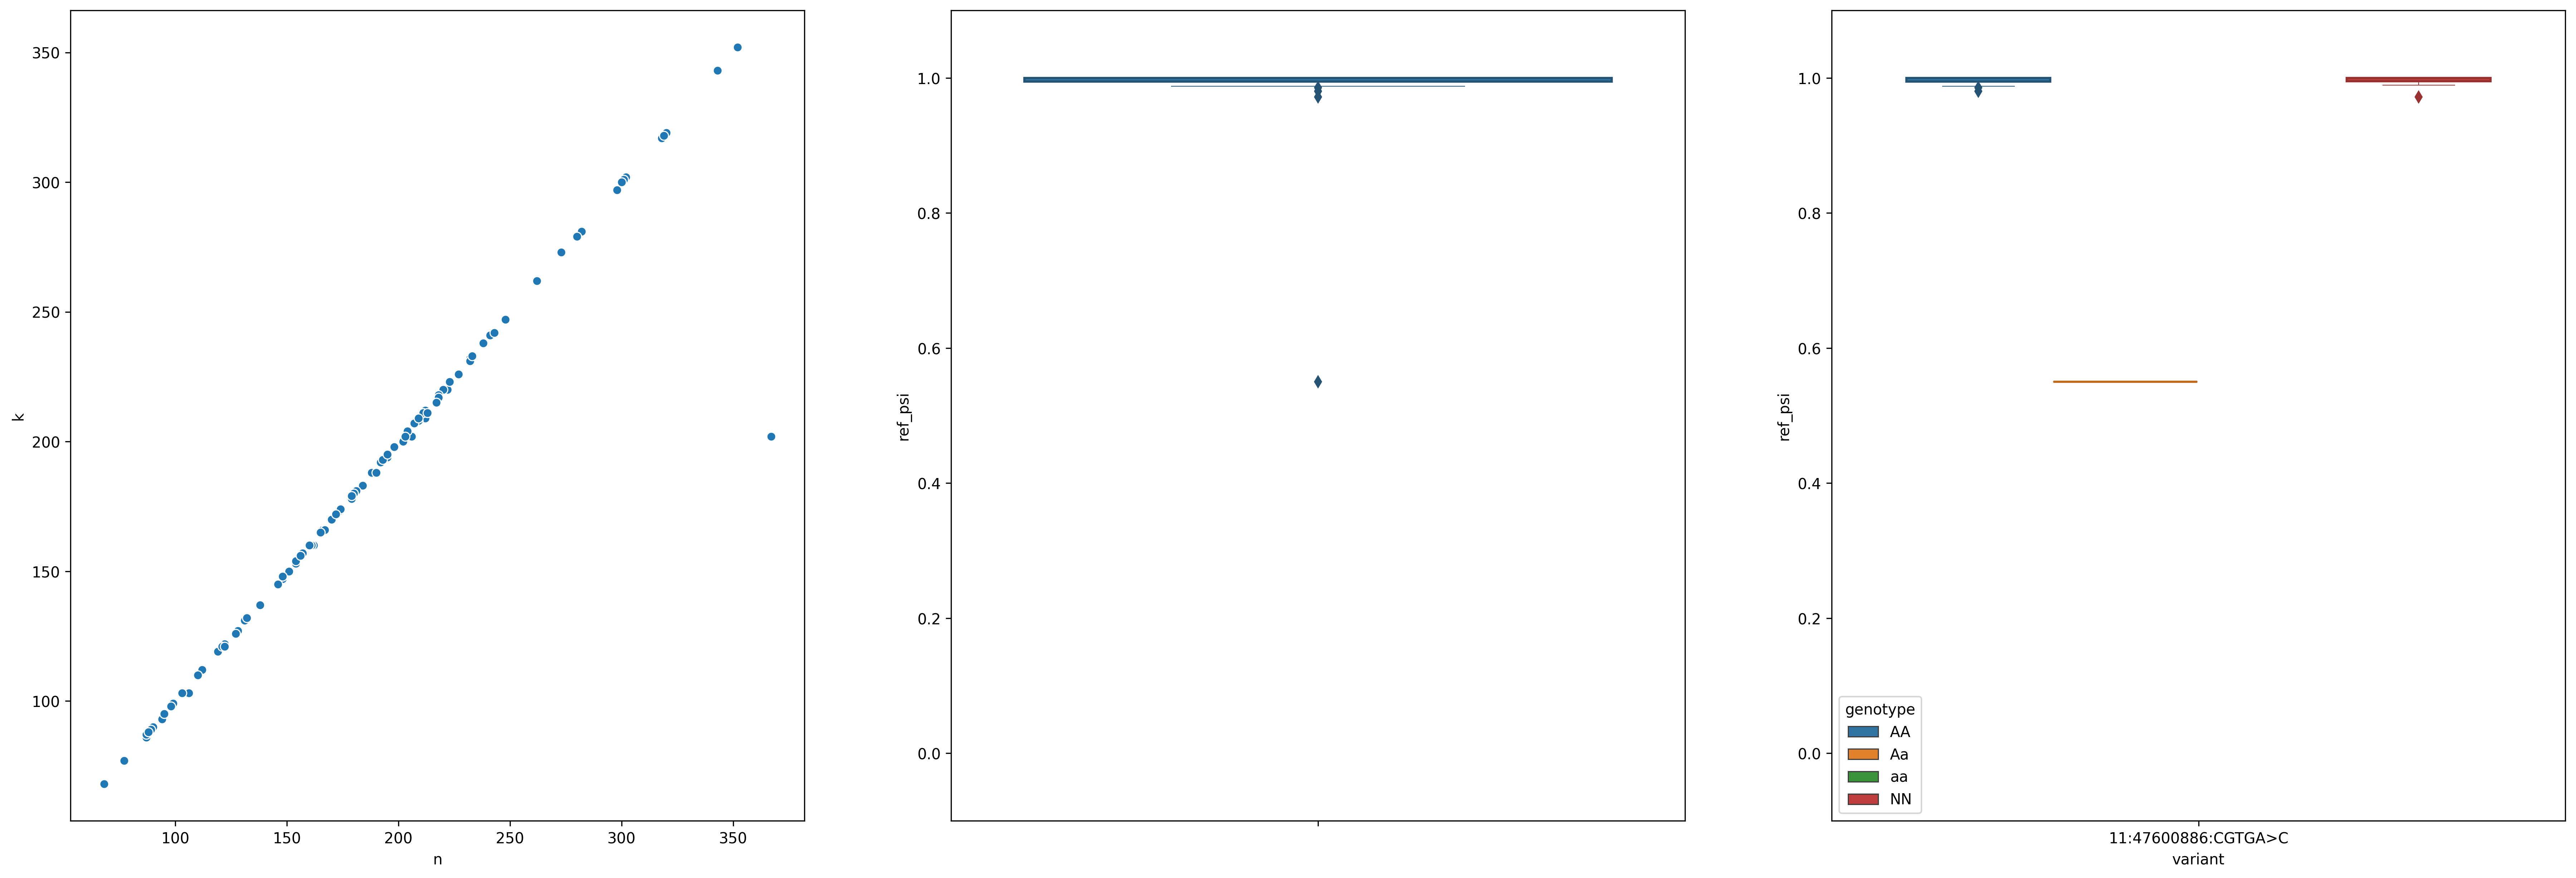

In [18]:
plt.figure(figsize=(30,10), dpi=300)
plt.subplot(1, 3, 1)
ct_psi5.plot_kn5(junction)

plt.subplot(1, 3, 2)
ct_psi5.plot_psi5(junction)

plt.subplot(1, 3, 3)
ct_psi5.plot_psi5_variants(junction, vcf)